##### importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
diabetes = pd.read_csv('diabetes.csv') # reading the  csv
diabetes.head(10) # we are reading 10 records 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# finding rows and columns
diabetes.shape

(768, 9)

In [5]:
diabetes.iloc[[0,1], 2]

0    72
1    66
Name: BloodPressure, dtype: int64

In [6]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes.loc[10]

Pregnancies                   4.000
Glucose                     110.000
BloodPressure                92.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          37.600
DiabetesPedigreeFunction      0.191
Age                          30.000
Outcome                       0.000
Name: 10, dtype: float64

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
ages= diabetes['Age'].value_counts()
ages

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64

In [10]:
preg_values = diabetes['Pregnancies'].value_counts()
preg_values

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:ylabel='Pregnancies'>

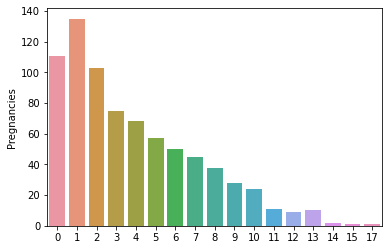

In [11]:
sns.barplot(x=preg_values.index, y=preg_values)

Text(0, 0.5, 'PREGNANCIES')

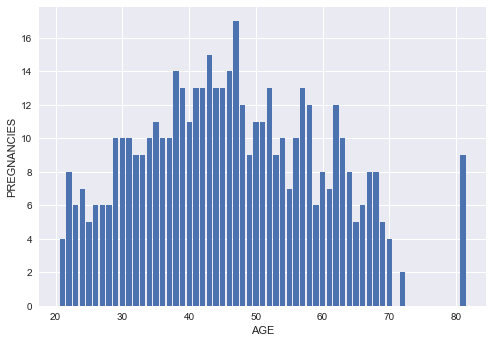

In [12]:
plt.style.use('seaborn')
plt.bar(diabetes['Age'],diabetes['Pregnancies'])
plt.xlabel('AGE')
plt.ylabel('PREGNANCIES')

In [13]:
filt_skin = (diabetes['SkinThickness'] == 0) | (diabetes['Insulin'] == 0)
diabetes[filt_skin]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
diabetes.loc[filt_skin, 'BMI']

0      33.6
1      26.6
2      23.3
5      25.6
7      35.3
       ... 
761    44.0
762    22.5
764    36.8
766    30.1
767    30.4
Name: BMI, Length: 374, dtype: float64

In [15]:
min = (diabetes.apply(pd.Series.min))

In [16]:
diabetes['Age to pregnancies ratio'] = diabetes['Pregnancies']/diabetes['Age']
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age to pregnancies ratio
0,6,148,72,35,0,33.6,0.627,50,1,0.120000
1,1,85,66,29,0,26.6,0.351,31,0,0.032258
2,8,183,64,0,0,23.3,0.672,32,1,0.250000
3,1,89,66,23,94,28.1,0.167,21,0,0.047619
4,0,137,40,35,168,43.1,2.288,33,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.158730
764,2,122,70,27,0,36.8,0.340,27,0,0.074074
765,5,121,72,23,112,26.2,0.245,30,0,0.166667
766,1,126,60,0,0,30.1,0.349,47,1,0.021277


In [17]:
diabetes.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.000000,17.000000
Glucose,768.0,120.894531,31.972618,0.000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.0,69.105469,19.355807,0.000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.0,20.536458,15.952218,0.000,0.000000,23.000000,32.000000,99.000000
Insulin,768.0,79.799479,115.244002,0.000,0.000000,30.500000,127.250000,846.000000
BMI,768.0,31.992578,7.884160,0.000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.626250,2.420000
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.000000,81.000000
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.000000,1.000000
Age to pregnancies ratio,768.0,0.108210,0.081790,0.000,0.041667,0.095238,0.166667,0.368421


In [18]:
diabetes['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Text(0, 0.5, 'PREGNANCIES')

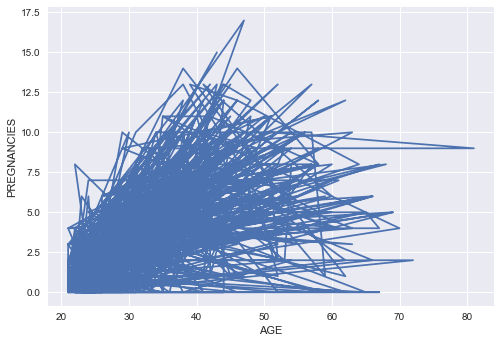

In [19]:
plt.plot(diabetes['Age'],diabetes['Pregnancies'])
plt.xlabel('AGE')
plt.ylabel('PREGNANCIES')

Text(0, 0.5, 'Insulin')

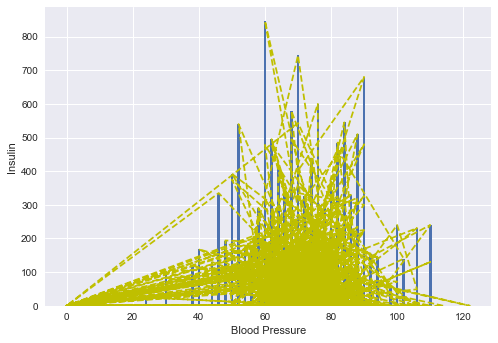

In [20]:
plt.plot(diabetes['BloodPressure'],diabetes['Insulin'], '--y')
plt.bar(diabetes['BloodPressure'],diabetes['Insulin'])
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')

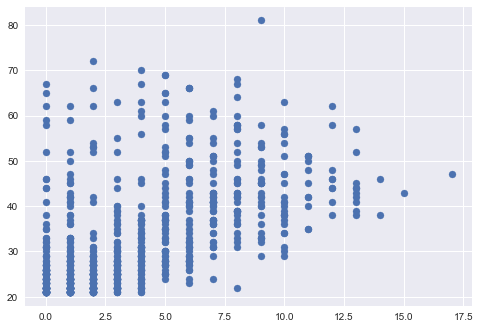

In [21]:
plt.scatter(diabetes.Pregnancies ,diabetes.Age)

In [22]:
reg = linear_model.LinearRegression()
reg.fit(diabetes[['Pregnancies']], diabetes.Age)

LinearRegression()

In [23]:
reg.predict([[10]])

array([44.93415498])

In [24]:
reg.coef_

array([1.89981617])

In [25]:
reg.intercept_


25.935993301610676

In [26]:
 new = (12,13,1,3,4,5,6,7,8,13,2,2,2,9)

In [27]:
df = pd.DataFrame({'Preg': new})
df

,Preg
0,12
1,13
2,1
3,3
4,4
5,5
6,6
7,7
8,8
9,13


In [28]:
a = reg.predict(df)
a

array([48.73378732, 50.63360349, 27.83580947, 31.63544181, 33.53525797,
       35.43507414, 37.33489031, 39.23470648, 41.13452265, 50.63360349,
       29.73562564, 29.73562564, 29.73562564, 43.03433881])

In [29]:
df['ages'] = a
df

,Preg,ages
0,12,48.733787
1,13,50.633603
2,1,27.835809
3,3,31.635442
4,4,33.535258
5,5,35.435074
6,6,37.334890
7,7,39.234706
8,8,41.134523
9,13,50.633603


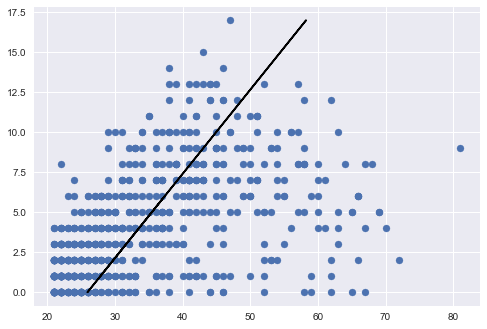

In [30]:
plt.scatter(diabetes.Age ,diabetes.Pregnancies)
plt.plot(reg.predict(diabetes[['Pregnancies']]), diabetes.Pregnancies, color = 'black')

In [32]:
diabetes.Age.median()

29.0

In [35]:
reg.fit(diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',]], diabetes.Age)

LinearRegression()

In [36]:
reg.coef_

array([ 1.68969932,  0.07297935,  0.10298721, -0.07035863, -0.00429653,
       -0.0270755 ])

In [37]:
reg.intercept_

13.458112462486763

In [38]:
reg.predict(diabetes[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

array([38.44004306, 25.38760416, 46.29125106, 25.6571861 , 23.22444891,
       37.3001348 , 25.90004908, 37.79196616, 32.09859075, 45.98489845,
       36.70142308, 49.20782159, 48.00446656, 29.05205538, 38.64900602,
       31.77167805, 25.18548604, 39.91441724, 21.5516923 , 27.28950392,
       31.82702755, 41.8931159 , 47.78120499, 42.34118474, 48.22155861,
       43.52115603, 42.7742259 , 26.73891945, 52.04065262, 38.99674214,
       34.78135698, 33.44382957, 29.24522167, 39.24642976, 44.36318792,
       30.11643494, 49.04407712, 40.44227516, 26.41943668, 30.53195844,
       35.2743856 , 42.55475221, 40.61557334, 48.52446647, 42.73903767,
       29.51039447, 30.7659388 , 26.57035291, 36.28990879, 32.94883992,
       29.25213678, 25.80280532, 32.8889544 , 44.49532494, 37.66607052,
       24.29834228, 40.86539863, 23.85765266, 31.4614915 , 23.09368147,
       22.96777687, 43.20625619, 30.82602007, 29.47099105, 39.51473343,
       34.06774613, 27.48502385, 33.11096002, 27.26939605, 36.51